In [3]:
import random
import cv2

from matplotlib import pyplot as plt
from pathlib import Path

import albumentations as A

In [4]:
print(A.__version__)

# !pip install -U albumentations
# !pip install -U git+https://github.com/albumentations-team/albumentations

1.4.0


In [5]:
DATA_ROOT = Path('/home/onkar/MyLearnings/Albumentations/TGSSaltIdentificationChallenge/DATASET/')

In [6]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(1, 2, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image')

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask')

        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image')

        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask')
    

In [7]:
DATA_TRAIN = DATA_ROOT/'TRAIN'


img = DATA_TRAIN/'images/0fea4b5049.png'
msk = DATA_TRAIN/'masks/0fea4b5049.png'

# print(f'image path : {img}, Exists :{img.exists()}')
# print(f'mask path  : {msk}, Exists :{msk.exists()}')

image = cv2.imread(str(img))
mask = cv2.imread(str(msk), cv2.IMREAD_GRAYSCALE)


In [8]:
print(image.shape, mask.shape)

original_height, original_width = image.shape[:2]
print(original_height, original_width)

(101, 101, 3) (101, 101)
101 101


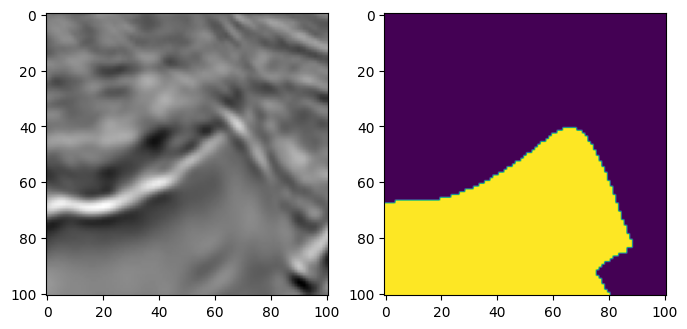

In [9]:
visualize(image, mask)

UNet type architecture requires input image size be divisible by $2^N$, where $N$ is the number of maxpooling layers. In the vanilla UNet $N=5$  $\Longrightarrow$, we need to pad input images to the closest divisible by $2^5 = 32$ number, which is 128. This operation may be performed using [**PadIfNeeded**](https://albumentations.readthedocs.io/en/latest/api/augmentations.html#albumentations.augmentations.transforms.PadIfNeeded) transformation. It pads both the image and the mask on all four sides. Padding type (zero, constant, reflection) may be specified. The default padding is reflection padding.

(128, 128, 3) (128, 128)


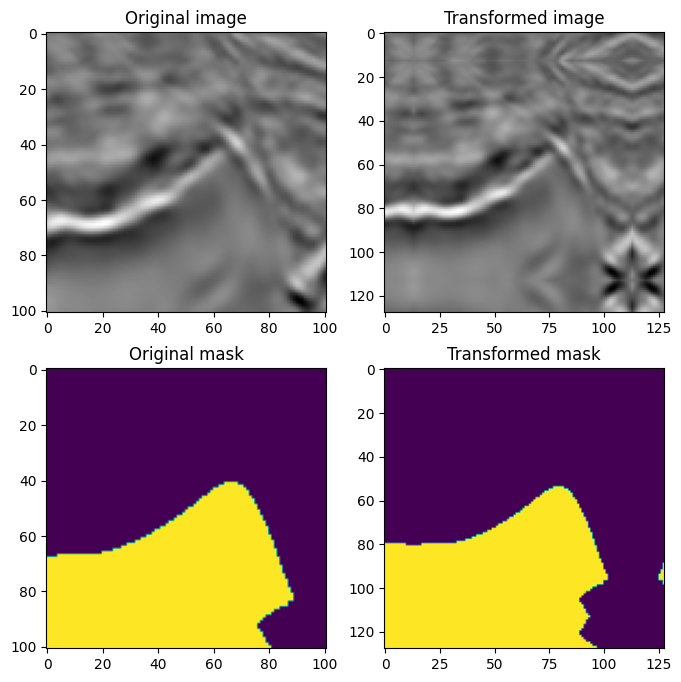

In [10]:
aug = A.PadIfNeeded(min_height=128, min_width=128)

augmented = aug(image=image, mask=mask)

image_padded = augmented['image']
mask_padded = augmented['mask']

print(image_padded.shape, mask_padded.shape)

visualize(image_padded, mask_padded, original_image=image, original_mask=mask)

(101, 101, 3) (101, 101)


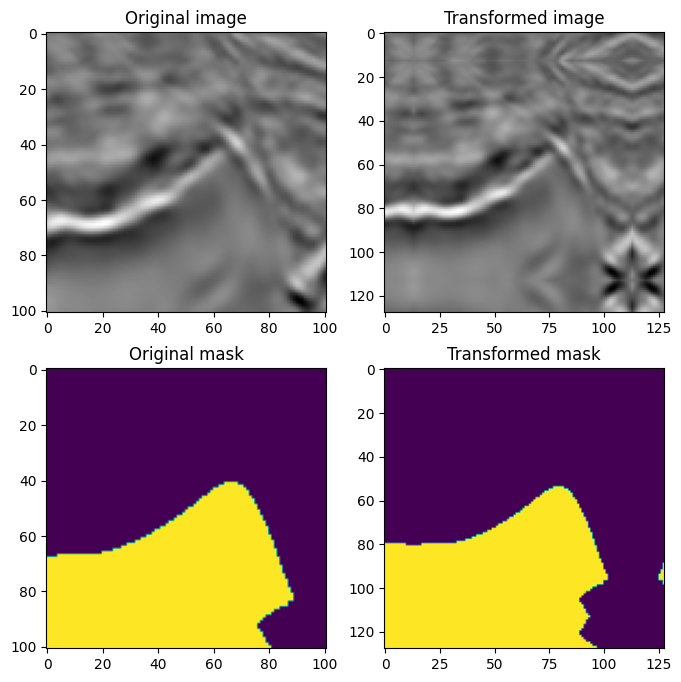

In [11]:
aug = A.CenterCrop(p=1, height=original_height, width=original_width)

augmented = aug(image=image_padded, mask=mask_padded)

image_center_cropped = augmented['image']
mask_center_cropped = augmented['mask']

print(image_center_cropped.shape, mask_center_cropped.shape)

assert (image - image_center_cropped).sum() == 0
assert (mask - mask_center_cropped).sum() == 0

visualize(image_padded, mask_padded, original_image=image_center_cropped, original_mask=mask_center_cropped)

In [12]:
print(f'original_height : {original_height}, original_width : {original_width}')
print(f'image_padded.shape: {image_padded.shape}, mask_padded.shape : {mask_padded.shape}')

original_height : 101, original_width : 101
image_padded.shape: (128, 128, 3), mask_padded.shape : (128, 128)


image_h_flipped : (101, 101, 3), mask_h_flipped : (101, 101)


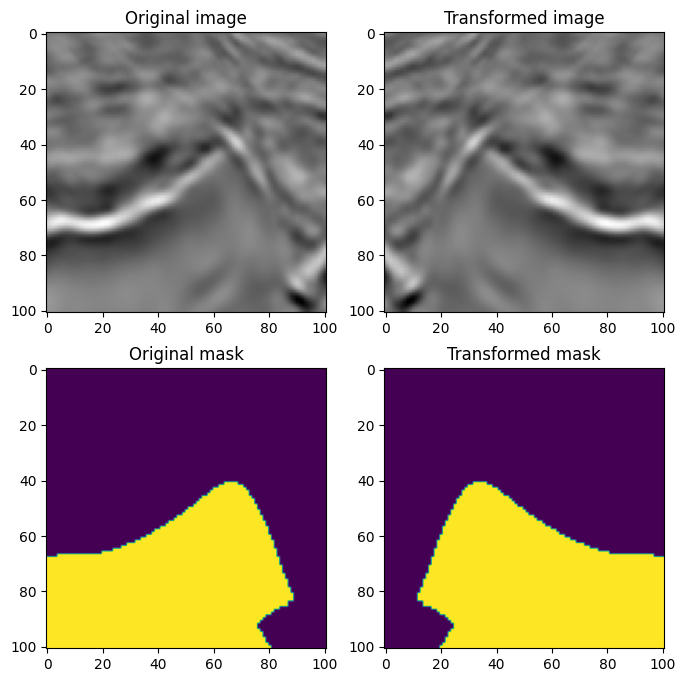

In [13]:
aug = A.HorizontalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_h_flipped = augmented['image']
mask_h_flipped = augmented['mask']

print(f'image_h_flipped : {image_h_flipped.shape}, mask_h_flipped : {mask_h_flipped.shape}')

visualize(image=image_h_flipped, mask=mask_h_flipped, original_image=image_center_cropped, original_mask=mask_center_cropped)

image_v_flipped : (101, 101, 3), mask_v_flipped : (101, 101)


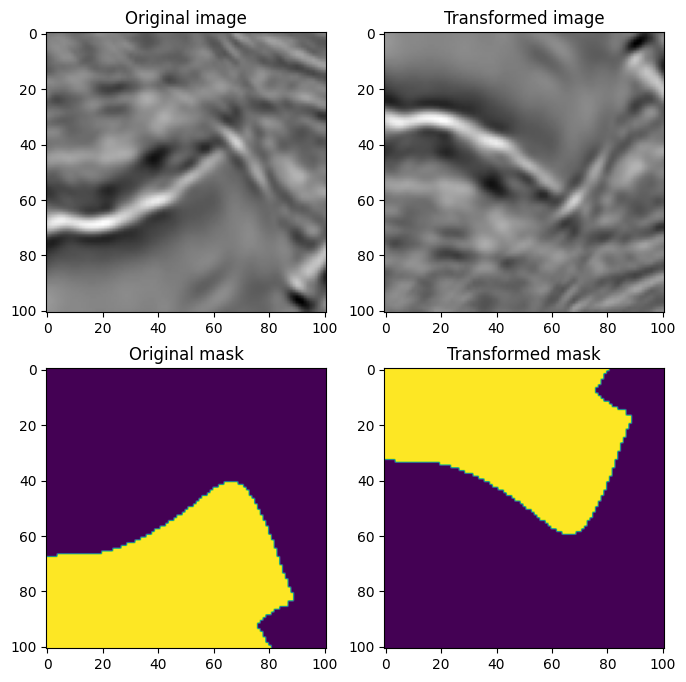

In [14]:
aug = A.VerticalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_v_flipped = augmented['image']
mask_v_flipped = augmented['mask']

print(f'image_v_flipped : {image_v_flipped.shape}, mask_v_flipped : {mask_v_flipped.shape}')

visualize(image=image_v_flipped, mask=mask_v_flipped, original_image=image_center_cropped, original_mask=mask_center_cropped)

image_v_flipped : (101, 101, 3), mask_v_flipped : (101, 101)


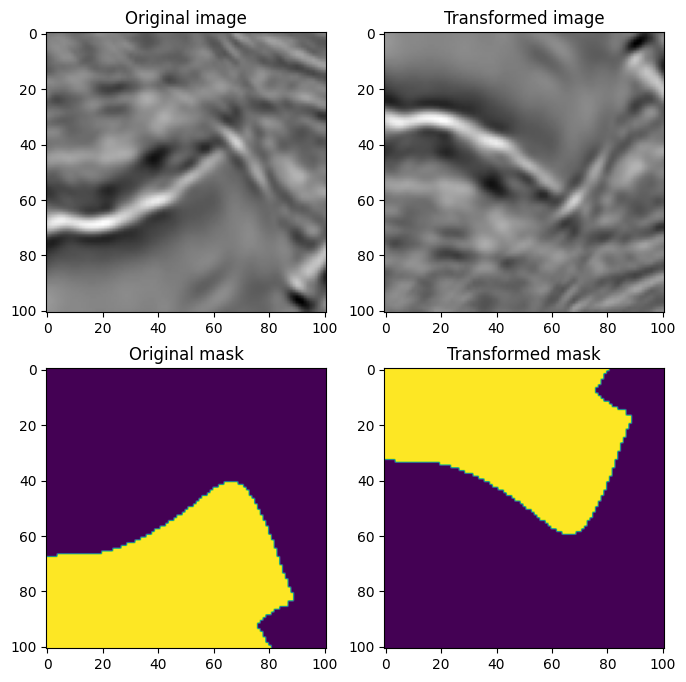

In [15]:
aug = A.VerticalFlip(p=1)

augmented = aug(image=image, mask=mask)

image_v_flipped = augmented['image']
mask_v_flipped = augmented['mask']

print(f'image_v_flipped : {image_v_flipped.shape}, mask_v_flipped : {mask_v_flipped.shape}')

visualize(image=image_v_flipped, mask=mask_v_flipped, original_image=image_center_cropped, original_mask=mask_center_cropped)

image_rot90 : (101, 101, 3), mask_rot90 : (101, 101)


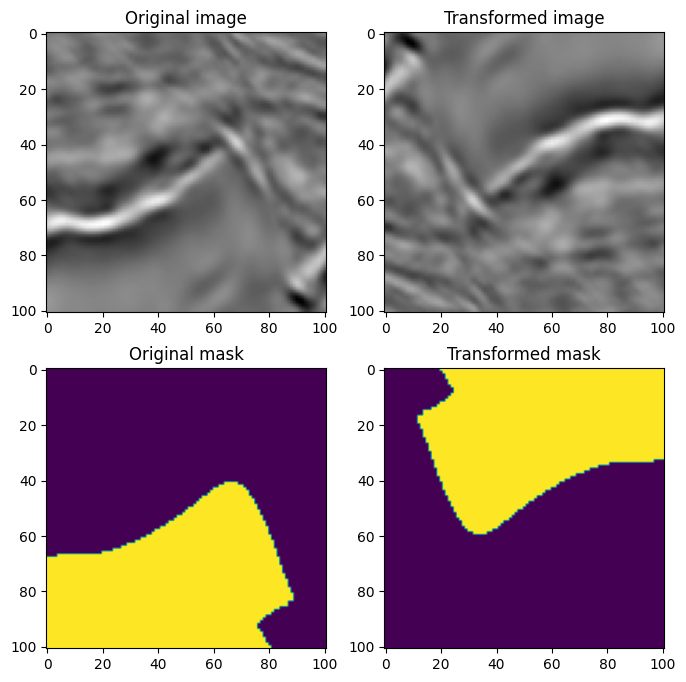

In [16]:
aug = A.RandomRotate90(p=1)

augmented = aug(image=image, mask=mask)

image_rot90 = augmented['image']
mask_rot90 = augmented['mask']

print(f'image_rot90 : {image_rot90.shape}, mask_rot90 : {mask_rot90.shape}')

visualize(image=image_rot90, mask=mask_rot90, original_image=image, original_mask=mask)

Let's try to combine different transformations

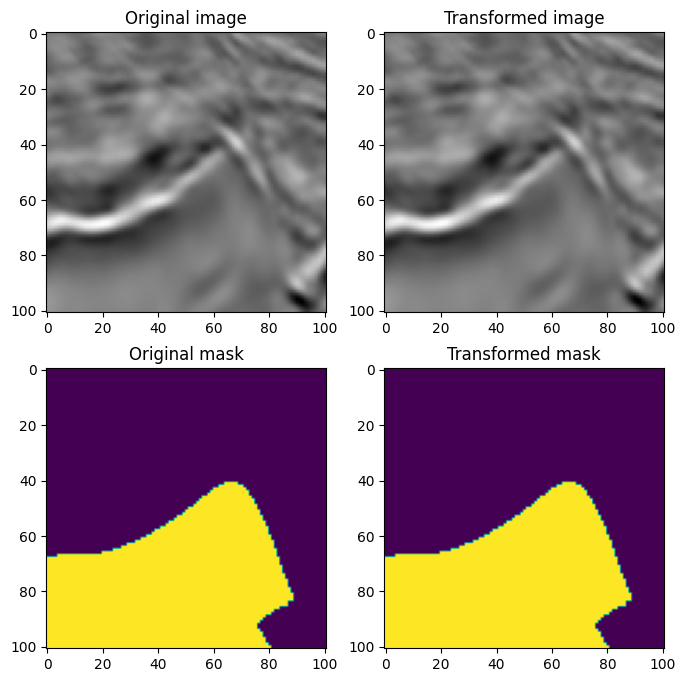

In [17]:
aug = A.Compose([
    A.VerticalFlip(p=0.2),
    A.RandomRotate90(p=0.5)]
                )

#random.seed(7)
augmented = aug(image=image, mask=mask)

image_light = augmented['image']
mask_light = augmented['mask']

visualize(image=image_light, mask=mask_light, original_image=image, original_mask=mask)


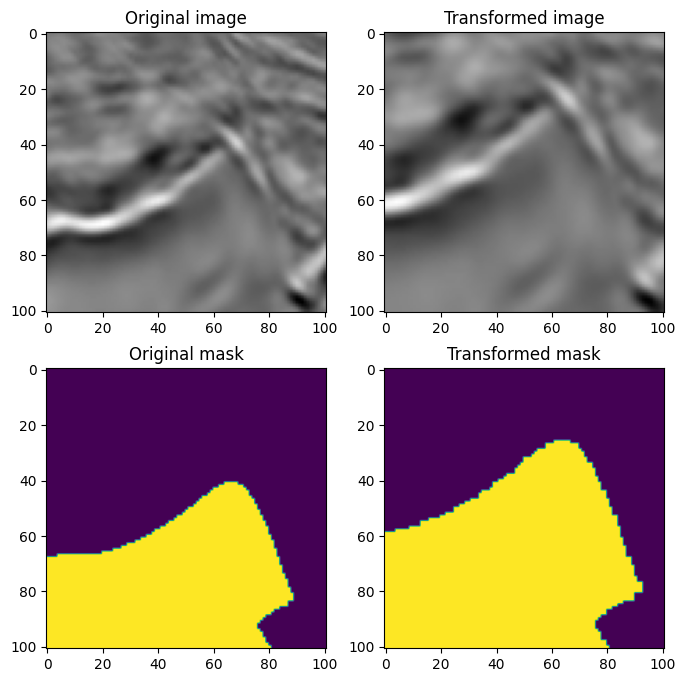

In [19]:
aug = A.RandomSizedCrop(min_max_height=(50, 101), height=original_height, width=original_width, p=1)

augmented = aug(image=image, mask=mask)

image_scaled = augmented['image']
mask_scaled  = augmented['mask']

visualize(image=image_scaled, mask=mask_scaled, original_image=image, original_mask=mask)

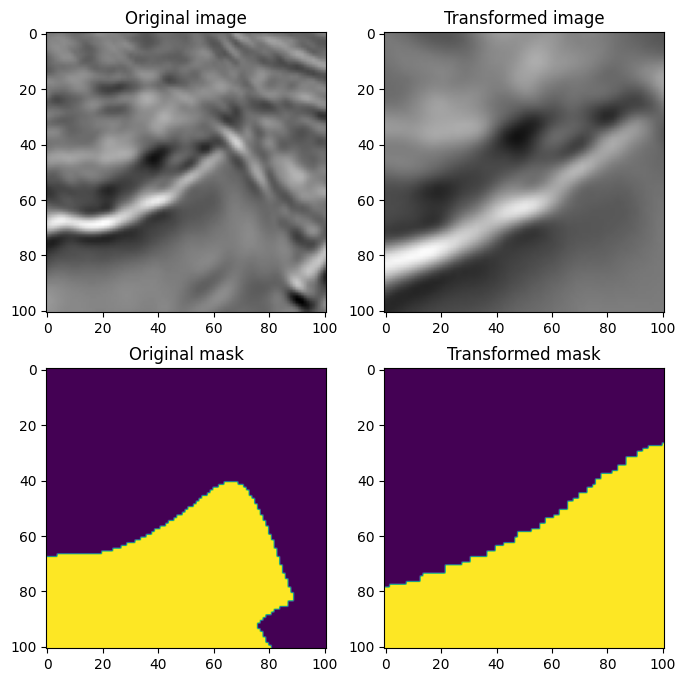

In [23]:
aug = A.Compose([
    A.OneOf([
        A.RandomSizedCrop(min_max_height=(50, 101), height=original_height, width=original_width, p=0.8),
        A.PadIfNeeded(min_height=original_height, min_width=original_width, p=0.5)
    ], p=1),
    A.VerticalFlip(p=0.8),
    A.RandomRotate90(p=0.2),
    A.OneOf([
        A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 *0.03),
        A.GridDistortion(p=0.5),
        A.OpticalDistortion(distort_limit=1, shift_limit=0.5, p=1),
    ], p=0.8)])

augmented = aug(image=image, mask=mask)
image_medium = augmented['image']
mask_medium = augmented['mask']

visualize(image_medium, mask_medium, original_image=image, original_mask=mask)